START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()


from mpld3 import plugins

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Microcosm

In [2]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height1 = 20  # Mixing layer depth in mm

### Soil - Hydrological Characteristics

In [3]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
kSat_crop2 = kSat_crop/100 
# ov_1 = 0.20   # Initial water content m3. m-3
ovSat_crop = 0.61  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck (mm)
psi_crop2 = 617.0  # soil suction Alteck (mm)
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)

# Results

## Hydrology - 1st pulse

##### Observed percolation

In [4]:
# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  

#### Computation

In [5]:
water_data = leachsim(kSat = kSat_crop,
                      soil_height=soil_height1,
                      soil = 'Alteck',
                      psi=psi_crop)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [6]:
water_eval = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = False,
    isFirstCycle=True 
)

FRESH
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.967591161606
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  3.80968602754
55 mm/h - 30min  -4.16283710639
30 mm/h - 30min  -21.305808952
--------------------------------------------
Mass balance:  True True True True


In [7]:
water_eval = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = True,
    isFirstCycle=True 
)

AGED
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.942064837787
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -35.8910849727
55 mm/h - 30min  -8.50907325802
30 mm/h - 30min  -30.5302507367
--------------------------------------------
Mass balance:  True True True True


In [8]:
# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmhA = water_data[:, 20]
time_size_55mmhB = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_135mmh,
               time_size_55mmhA, time_size_55mmhA,
               time_size_55mmhB, time_size_55mmhB,
               time_size_30mmh, time_size_30mmh]


In [9]:
#hydroplot(percol_data1, 
#          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
#          leach_high_6min, 
#          leach_med_12min, leach_med_30min, 
#          leach_low_30min,
#          "Leached Volume [mL] - Crop Soil 1st Pulse")

## Transport - 1st pulse

** Initial and observed mass in leachate and ponding **

In [88]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs, 
               # initial_mass_error, error_lecah, error_pond)
    
smCr_dict_S_1st = {
    'a_high_0d': (5176.88, 65.7, 'nan', 1657, 3.7, 'nan'),
    'b_high_1d': (4213.1, 77.7, 'nan', 1400, 4.3, 'nan'),
    'c_med12_0d': (5176.88, 79.5, 'nan', 1657, 4.4, 'nan' ),
    'd_med12_1d': (4213.1, 16.9, 'nan', 1400, 0.9, 'nan'),
    'e_med30_0d': (6833.88, 327.4, 'nan', 1657, 18.2, 'nan'), # 5176.88 +/- 1657 
    'f_med30_1d': (4213.1, 153.4, 'nan', 1400, 8.5, 'nan'),
    'g_low_0d': (5176.88, 70.9, 'nan', 1657, 3.9, 'nan'),
    'h_low_1d': (4213.1, 110.7, 'nan', 1400, 6.2, 'nan')
}

smCr_dict_L_1st = {
    'a_high_0d': (3460.85, 53.5, 'nan', 1135, 2.98, 'nan'),
    'b_high_1d': (2832.66, 89.2, 'nan', 946, 4.97, 'nan'),
    'c_med12_0d': (3460.85, 49.4, 'nan', 1135, 2.75, 'nan'),
    'd_med12_1d': (2832.66, 70.5, 'nan', 946, 3.93, 'nan'),
    'e_med30_0d': (4595.85, 281.7, 'nan', 1135, 15.7, 'nan'),  # 3460.85 +/- 1135
    'f_med30_1d': (2832.66, 116.4, 'nan', 946, 6.49, 'nan'),
    'g_low_0d': (3460.85, 142.7, 'nan', 1135, 7.9, 'nan'),
    'h_low_1d': (2832.66, 127.2, 'nan', 946, 7.08, 'nan')
}

### Soil - Transport Charachteristics

In [89]:
# Soil characteristics

# Initial bulk density options:
# pb_crop_i = 0.1/10**3  # bulk density (g/cm^3) -> g/mm^3  (FAKE TEST)

# pb_crop_i1 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_crop_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_crop_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_crop_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
# pb_crop_f1 = 13.59/10**3 # final1, TEST
pb_crop_f2 = 3.76/10**3 # final2, calculated from experimental conditions.
# pb_crop_f2 = 13.76/10**3 # final2, TEST


porosity_crop = 0.61  # Crop soil

# Assumed (used to calculate Reynolds number)
runoff_vel = 20.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley - Scenario 2)
# foc_crop_untreat2 = 2.04/100
# foc_crop_sterile2 = 0.70*foc_crop_untreat2

### S-metolachlor Properties

In [90]:
# Koc Ranges (EU COmmision SANCO/1426/2001 - rev. 3. 4 October 2004)
# Koc_smeto = [369, 200, 110, 70, 65, 21]  # [ml/g]
Koc_smeto = [250, 225, 200, 150, 125, 100, 75, 50, 30]  # [ml/g]
Koc_smeto = np.array(Koc_smeto)*10**3

# Kd (S-metolachlor)
Kd_smeto_crop_sterile1 = Koc_smeto[0]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat1 = Koc_smeto[0]*foc_crop_untreat
Kd_smeto_crop_sterile2 = Koc_smeto[1]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat2 = Koc_smeto[1]*foc_crop_untreat 
Kd_smeto_crop_sterile3 = Koc_smeto[2]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat3 = Koc_smeto[2]*foc_crop_untreat 
Kd_smeto_crop_sterile4 = Koc_smeto[3]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat4 = Koc_smeto[3]*foc_crop_untreat
Kd_smeto_crop_sterile5 = Koc_smeto[4]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat5 = Koc_smeto[4]*foc_crop_untreat 
Kd_smeto_crop_sterile6 = Koc_smeto[5]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat6 = Koc_smeto[5]*foc_crop_untreat
Kd_smeto_crop_sterile7 = Koc_smeto[6]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat7 = Koc_smeto[6]*foc_crop_untreat
Kd_smeto_crop_sterile8 = Koc_smeto[7]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat8 = Koc_smeto[7]*foc_crop_untreat
Kd_smeto_crop_sterile9 = Koc_smeto[8]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat9 = Koc_smeto[8]*foc_crop_untreat

Kd_smeto_sterile = [Kd_smeto_crop_sterile1,
                    Kd_smeto_crop_sterile2,
                    Kd_smeto_crop_sterile3,
                    Kd_smeto_crop_sterile4,
                   Kd_smeto_crop_sterile5, 
                   Kd_smeto_crop_sterile6,
                   Kd_smeto_crop_sterile7,
                   Kd_smeto_crop_sterile8,
                   Kd_smeto_crop_sterile9]
                    
Kd_smeto_living = [Kd_smeto_crop_untreat1, 
                   Kd_smeto_crop_untreat2, 
                   Kd_smeto_crop_untreat3, 
                   Kd_smeto_crop_untreat4,
                  Kd_smeto_crop_untreat5,
                  Kd_smeto_crop_untreat6,
                  Kd_smeto_crop_untreat7,
                  Kd_smeto_crop_untreat8,
                  Kd_smeto_crop_untreat9]

In [91]:
# kdmx_array = np.asarray(Kd_smeto_sterile)
# np.log10(kdmx_array)

### Computation transport - 1st pulse

In [92]:
# Any length unit input must be: "mm"
pest_sterile_1st = pest_linear(
    Kd_smeto_sterile,
    smCr_dict_S_1st,          
    pb_crop_i1, pb_crop_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = True,
    isLiving = False)

1st Pulse
Sterile
--------------------------------------------
Koc tested:  [ 250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best log Kd:  0.5272302176375299 cm3/g ( Num:  4 ) 
 R2:  0.838679573686
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -46.352355395 | 35.2465025055 | 65.7
(A) 135 mm/h - Aged  -63.0828063974 | 28.6846594292 | 77.7
(B) 55 mm/h - Fresh  -69.0267109283 | 24.623764812 | 79.5
(B) 55 mm/h - Aged  18.5772622837 | 20.039557326 | 16.9
(C) 55 mm/h - Fresh  -9.76152289545 | 295.44077404 | 327.4
(C) 55 mm/h - Aged  18.7352010067 | 182.139798344 | 153.4
(D) 30 mm/h - Fresh  55.8572454841 | 239.084038899 | 70.9
(D) 30 mm/h - Aged  -18.7619893057 | 194.573751813 | 110.7


#### Test factor X (Sterile)

In [93]:
x = 2

In [94]:
pest_sterile_1st = pest_linear_x(
    Kd_smeto_sterile,
    x,
    smCr_dict_S_1st,          
    pb_crop_i1, pb_crop_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = True,
    isLiving = False)

1st Pulse
Sterile
--------------------------------------------
Koc tested:  [ 250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best log Kd (Fresh):  0.7490789672538862 cm3/g ( Num:  1 ) 
 x factor:  2 R2:  0.840756811002
Best log Kd (Aged):  0.5272302176375299 cm3/g ( Num:  4 ) 
 x factor: No factor considered. R2:  0.103922239893
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -2.64762940477 | 63.9605074811 | 65.7
(A) 135 mm/h - Aged  -63.0828063974 | 28.6846594292 | 77.7
(B) 55 mm/h - Fresh  -56.4063832813 | 34.6569252913 | 79.5
(B) 55 mm/h - Aged  18.5772622837 | 20.039557326 | 16.9
(C) 55 mm/h - Fresh  10.9181292091 | 363.14595503 | 327.4
(C) 55 mm/h - Aged  18.7352010067 | 182.139798344 | 153.4
(D) 30 mm/h - Fresh  110.367335251 | 283.906051269 | 70.9
(D) 30 mm/h - Aged  -18.7619893057 | 194.573751813 | 110.7


In [95]:
"""
pest_sterile_1st = pest_langmuir(
    Kd_smeto_sterile,
    [10, 50, 90, 100, 101, 200],
    smCr_dict_S_1st,          
    pb_crop_i1, pb_crop_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = True,
    isLiving = False)
"""

'\npest_sterile_1st = pest_langmuir(\n    Kd_smeto_sterile,\n    [10, 50, 90, 100, 101, 200],\n    smCr_dict_S_1st,          \n    pb_crop_i1, pb_crop_f1,\n    percol_data1, runoff_data1,\n    time_sizes1,\n    area, soil_height1, \n    d, runoff_vel,\n    soil = "Alteck",\n    KFILM = True,\n    isFirstCycle = True,\n    isLiving = False)\n'

In [96]:
# Any length unit input must be: "mm"
pest_living_1st = pest_linear(
    Kd_smeto_living,
    smCr_dict_L_1st,          
    pb_crop_i1, pb_crop_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)

1st Pulse
Living
--------------------------------------------
Koc tested:  [ 250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best log Kd:  0.37964085580642226 cm3/g ( Num:  7 ) 
 R2:  0.748639882895
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -17.7442957775 | 44.0068017591 | 53.5
(A) 135 mm/h - Aged  -59.6199710552 | 36.0189858187 | 89.2
(B) 55 mm/h - Fresh  -37.197232187 | 31.0245672996 | 49.4
(B) 55 mm/h - Aged  -63.9812788143 | 25.3931984359 | 70.5
(C) 55 mm/h - Fresh  2.77365004282 | 289.513372171 | 281.7
(C) 55 mm/h - Aged  53.3007402078 | 178.442061602 | 116.4
(D) 30 mm/h - Fresh  -10.1894190203 | 223.059847805 | 142.7
(D) 30 mm/h - Aged  -17.533788975 | 182.571538346 | 127.2


#### Test factor X (Living)

In [97]:
x = 2

In [98]:
pest_living_1st = pest_linear_x(
    Kd_smeto_living,
    x,
    smCr_dict_L_1st,          
    pb_crop_i1, pb_crop_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)

1st Pulse
Living
--------------------------------------------
Koc tested:  [ 250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best log Kd (Fresh):  0.6806708514704034 cm3/g ( Num:  4 ) 
 x factor:  2 R2:  0.979031904651
Best log Kd (Aged):  0.37964085580642226 cm3/g ( Num:  7 ) 
 x factor: No factor considered. R2:  -0.527625338018
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -17.7442957775 | 44.0068017591 | 53.5
(A) 135 mm/h - Aged  -59.6199710552 | 36.0189858187 | 89.2
(B) 55 mm/h - Fresh  -37.197232187 | 31.0245672996 | 49.4
(B) 55 mm/h - Aged  -63.9812788143 | 25.3931984359 | 70.5
(C) 55 mm/h - Fresh  2.77365004282 | 289.513372171 | 281.7
(C) 55 mm/h - Aged  53.3007402078 | 178.442061602 | 116.4
(D) 30 mm/h - Fresh  -10.1894190203 | 223.059847805 | 142.7
(D) 30 mm/h - Aged  -17.533788975 | 182.571538346 | 127.2


#### Sterile time series

In [99]:
# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_1st[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_1st[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_1st[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_1st[:, 9]
high_1d_overmass_dt = pest_sterile_1st[:, 10]
med12_0d_overmass_dt = pest_sterile_1st[:, 11]
med12_1d_overmass_dt = pest_sterile_1st[:, 12]

med30_0d_overmass_dt = pest_sterile_1st[:, 13]
med30_1d_overmass_dt = pest_sterile_1st[:, 14]
low_0d_overmass_dt = pest_sterile_1st[:, 15]
low_1d_overmass_dt = pest_sterile_1st[:, 16]


mass_percol_sterile1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

#### Living time series

In [100]:
# Cumulative leachate
high_0d_cum_mass_out_dt = pest_living_1st[:, 1]
high_1d_cum_mass_out_dt = pest_living_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_living_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_living_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_living_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_living_1st[:, 6]

low_0d_cum_mass_out_dt = pest_living_1st[:, 7]
low_1d_cum_mass_out_dt = pest_living_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_1st[:, 9]
high_1d_overmass_dt = pest_living_1st[:, 10]
med12_0d_overmass_dt = pest_living_1st[:, 11]
med12_1d_overmass_dt = pest_living_1st[:, 12]

med30_0d_overmass_dt = pest_living_1st[:, 13]
med30_1d_overmass_dt = pest_living_1st[:, 14]
low_0d_overmass_dt = pest_living_1st[:, 15]
low_1d_overmass_dt = pest_living_1st[:, 16]


mass_percol_living1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

## Plotting transport - S-metolachlor

### Sterile (1st Pulse, Crop Soil)

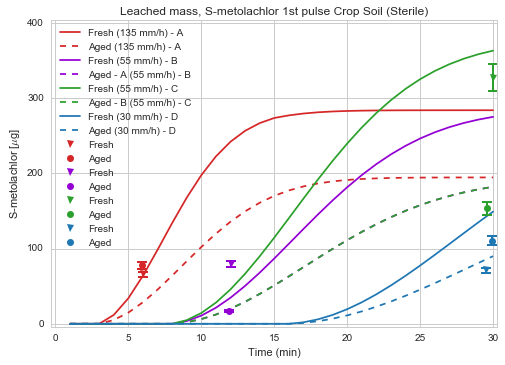

In [101]:
pestiplot_condition(
    mass_percol_sterile1,
    smCr_dict_S_1st,
    'S-metolachlor',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

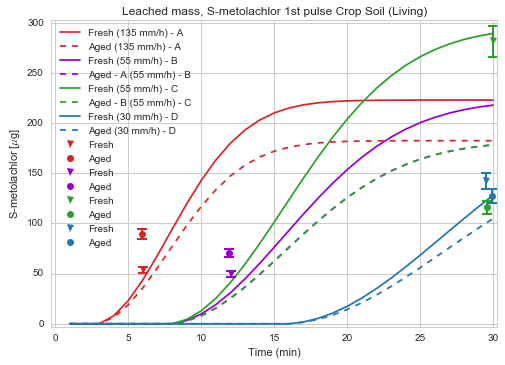

In [102]:
pestiplot_condition(
    mass_percol_living1,
    smCr_dict_L_1st,
    'S-metolachlor',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

In [ ]:
''' Hydrological controlling parameters'''
ov_2 = ovSat_crop - 0.038  # Initial water content m3. m-3
psi_crop = 1100  # soil suction Alteck mm
psi_cropB = 617  # soil suction Alteck mm
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height2 = 20  # mm

**Observed Percolation - 2nd pulse**

In [ ]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([14.192, 8.245, 2.410, 5.469]) 

# At 12 min, med intensity
leach_med_12min = np.array([18.672, 19.0, 0.830, 11.407]) 

# At 30min, med intensity
leach_med_30min = np.array([12.697, 2.473, 3.52, 20.291])  

# At 30min, low intensity
leach_low_30min = np.array([29.656, 9.375, 0.409, 3.385]) 

**Observed Ponding - 2nd pulse**

In [ ]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([10.824, 20.935, 24.75, 19.041])  

# all at 12 min, med intensity
roff_med_12min = np.array([0, 3.907, 19.436, 7.313]) 

# all at 30min, med intensity
roff_med_30min = np.array([43.764, 28.911, 51.964, 33.478])  

# all at 30min, low intensity
roff_low_30min = np.array([0, 22.618, 28.598, 27.314])  

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [ ]:
water2_ktest = leachsim3(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop/25, kSat_crop/50, kSat_crop/75, kSat_crop/100, 
            kSat_crop/125, kSat_crop/150, kSat_crop/175, 
            kSat_crop/200, kSat_crop/250, kSat_crop/700, kSat_crop/1000],
    soil_height=soil_height2,
    soil = 'Alteck',
    isFirstCycle = False
)

#### Time series

In [ ]:
# Time axis
cum_time_30min = water2_ktest[:, 0]

# Cumulative leachate
cum_leach_135mmh_SF = water2_ktest[:, 2]
cum_leach_135mmh_SA = water2_ktest[:, 4]
cum_leach_135mmh_LF = water2_ktest[:, 6]
cum_leach_135mmh_LA = water2_ktest[:, 8]

cum_leach_55mmhA_SF = water2_ktest[:, 10]
cum_leach_55mmhA_SA = water2_ktest[:, 12]
cum_leach_55mmhA_LF = water2_ktest[:, 14]
cum_leach_55mmhA_LA = water2_ktest[:, 16]

cum_leach_55mmhB_SF = water2_ktest[:, 18]
cum_leach_55mmhB_SA = water2_ktest[:, 20]
cum_leach_55mmhB_LF = water2_ktest[:, 22]
cum_leach_55mmhB_LA = water2_ktest[:, 24]

cum_leach_30mmh_SF = water2_ktest[:, 26]
cum_leach_30mmh_SA = water2_ktest[:, 28]
cum_leach_30mmh_LF = water2_ktest[:, 30]
cum_leach_30mmh_LA = water2_ktest[:, 32]

# Group each compartment for graphing
percol_data2 = stackdata16(
    cum_time_30min,
    cum_leach_135mmh_SF, cum_leach_55mmhA_SF, cum_leach_55mmhB_SF, cum_leach_30mmh_SF,
    cum_leach_135mmh_SA, cum_leach_55mmhA_SA, cum_leach_55mmhB_SA, cum_leach_30mmh_SA,
    cum_leach_135mmh_LF, cum_leach_55mmhA_LF, cum_leach_55mmhB_LF, cum_leach_30mmh_LF,
    cum_leach_135mmh_LA, cum_leach_55mmhA_LA, cum_leach_55mmhB_LA, cum_leach_30mmh_LA)

# Ponding cumulative
cum_roff_135mmh_SF = water2_ktest[:, 1]
cum_roff_135mmh_SA = water2_ktest[:, 3]
cum_roff_135mmh_LF = water2_ktest[:, 5]
cum_roff_135mmh_LA = water2_ktest[:, 7]

cum_roff_55mmhA_SF = water2_ktest[:, 9]
cum_roff_55mmhA_SA = water2_ktest[:, 11]
cum_roff_55mmhA_LF = water2_ktest[:, 13]
cum_roff_55mmhA_LA = water2_ktest[:, 15]

cum_roff_55mmhB_SF = water2_ktest[:, 17]
cum_roff_55mmhB_SA = water2_ktest[:, 19]
cum_roff_55mmhB_LF = water2_ktest[:, 21]
cum_roff_55mmhB_LA = water2_ktest[:, 23]

cum_roff_30mmh_SF = water2_ktest[:, 25]
cum_roff_30mmh_SA = water2_ktest[:, 27]
cum_roff_30mmh_LF = water2_ktest[:, 29]
cum_roff_30mmh_LA = water2_ktest[:, 31]

runoff_data2 = stackdata16(
    cum_time_30min,
    cum_roff_135mmh_SF, cum_roff_55mmhA_SF, cum_roff_55mmhB_SF, cum_roff_30mmh_SF,
    cum_roff_135mmh_SA, cum_roff_55mmhA_SA, cum_roff_55mmhB_SA, cum_roff_30mmh_SA,
    cum_roff_135mmh_LF, cum_roff_55mmhA_LF, cum_roff_55mmhB_LF, cum_roff_30mmh_LF,
    cum_roff_135mmh_LA, cum_roff_55mmhA_LA, cum_roff_55mmhB_LA, cum_roff_30mmh_LA)


time_size_135mmh = water2_ktest[:, 33]
time_size_55mmhA = water2_ktest[:, 34]
time_size_55mmhB = water2_ktest[:, 35]
time_size_30mmh = water2_ktest[:, 36]

time_sizes2 = [time_size_135mmh, time_size_135mmh,
               time_size_55mmhA, time_size_55mmhA,
               time_size_55mmhB, time_size_55mmhB,
               time_size_30mmh, time_size_30mmh]

## Transport - 2nd pulse

** Initial and observed mass in leachate and ponding **

In [ ]:
# S-metolachlor Crop, 2nd pulse.
smCr_dict_S_2nd = {
    'a_high_0d': (3698.64, 2.4, 1.9, 1660, 0.1, 0.1),
    'b_high_1d': (2992.53, 16.8, 1.1, 1404, 1.0, 0.1),
    'c_med12_0d': (3688.61, 82.5, 'nan', 1661, 4.6, 'nan'),
    'd_med12_1d': (3036.55, 'nan', 3.4, 1401, 'nan', 0.2),
    'e_med30_0d': (3509.28, 37.9, 2.4, 1675, 2.1, 0.1),
    'f_med30_1d': (2937.71, 24.3, 8.6, 1408, 1.4, 0.5),
    'g_low_0d': (3694.88, 102.7, 'nan', 1661, 5.7, 'nan'),
    'h_low_1d': (2968.65, 'nan', 5.0, 1406, 'nan', 0.3)
}

smCr_dict_L_2nd = {
    'a_high_0d': (2466.7, 43.7, 1.4, 1138, 2.44, 0.08),
    'b_high_1d': (1985.26, 19.9, 0.4, 951, 1.1, 0.02),
    'c_med12_0d': (2468.61, 66.8, 'nan', 1137, 3.72, 'nan'),
    'd_med12_1d': (1998.26, 37.9, 'nan', 950, 2.1, 'nan'),
    'e_med30_0d': (2300.56, 16.8, 5.6, 1150, 1., 0.31),
    'f_med30_1d': (1965.55, 46.4, 1.4, 952, 2.59, 0.08),
    'g_low_0d': (2401.14, 22.7, 3.4, 1143, 1.26, 0.19),
    'h_low_1d': (1957.78, 16.7, 4.2, 953, 0.93, 0.24)
}

#### Change in organic matter characterisitics

In [ ]:
# ignored...

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [ ]:

pest_sterile_2nd = pest_linear(
    Kd_smeto_sterile,
    smCr_dict_S_2nd,
    pb_crop_i2, pb_crop_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = False)


#### Kd optimal (living)

In [ ]:

pest_living_2nd = pest_linear(
    Kd_smeto_living,
    smCr_dict_L_2nd,
    pb_crop_i2, pb_crop_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = True)


#### Sterile time series

In [ ]:
# Time axis
cum_time_30min = pest_sterile_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_2nd[:, 9]
high_1d_overmass_dt = pest_sterile_2nd[:, 10]
med12_0d_overmass_dt = pest_sterile_2nd[:, 11]
med12_1d_overmass_dt = pest_sterile_2nd[:, 12]

med30_0d_overmass_dt = pest_sterile_2nd[:, 13]
med30_1d_overmass_dt = pest_sterile_2nd[:, 14]
low_0d_overmass_dt = pest_sterile_2nd[:, 15]
low_1d_overmass_dt = pest_sterile_2nd[:, 16]

mass_percol_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)


#### Living time series

In [ ]:
# Time axis
cum_time_30min = pest_living_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_living_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_living_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_living_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_living_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_living_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_living_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_living_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_living_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_2nd[:, 9]
high_1d_overmass_dt = pest_living_2nd[:, 10]
med12_0d_overmass_dt = pest_living_2nd[:, 11]
med12_1d_overmass_dt = pest_living_2nd[:, 12]

med30_0d_overmass_dt = pest_living_2nd[:, 13]
med30_1d_overmass_dt = pest_living_2nd[:, 14]
low_0d_overmass_dt = pest_living_2nd[:, 15]
low_1d_overmass_dt = pest_living_2nd[:, 16]

mass_percol_living2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt,
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt,
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)



## Plotting transport - S-metolachlor

### Sterile (2nd Pulse, Crop Soil)

In [ ]:
pestiplot_condition(
    mass_percol_sterile2,
    smCr_dict_S_2nd,
    'S-metolachlor',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

In [ ]:
pestiplot_condition(
    mass_pond_sterile2,
    smCr_dict_S_2nd,
    'S-metolachlor',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse, Crop Soil)

In [ ]:
pestiplot_condition(
    mass_percol_living2,
    smCr_dict_L_2nd,
    'S-metolachlor',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

In [ ]:
pestiplot_condition(
    mass_pond_living2,
    smCr_dict_L_2nd,
    'S-metolachlor',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK